In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Cleaned events but with strict flagging

In [191]:
optical_efficiency_cleaned = np.array([])
for i in range(1,50):
    #filename = f'/Users/vdk/opt_eff/opt_eff_{i*10}_{i*10+10}.txt'
    filename = f'/Users/vdk/new_output/opt_eff_{i*10}_{i*10+10}_postpix50_FLAGDELETED.txt'
    #filename = f'/Users/vdk/new_output/opt_eff_{i*10}_{i*10+10}.txt'
    with open(filename,'r') as fin:
        line = fin.readline()
        split_line = line.split(',')
        new_line = list(filter(None, split_line))
        new_line = [float(i) for i in new_line]
        optical_efficiency_cleaned = np.append(optical_efficiency_cleaned,new_line)
        #print(new_line)

events_cleaned = []
for i in range(1,50):
    #filename = f'/Users/vdk/opt_eff/opt_eff_runStat_{i*10}_{i*10+10}.txt'
    filename = f'/Users/vdk/new_output/opt_eff_runStat_{i*10}_{i*10+10}_postpix50_FLAGDELETED.txt'
    with open(filename,'r') as fin:
        line = fin.readline()
        split_line = line.split(',')
        new_line = list(filter(None, split_line))
        new_line = [int(i) for i in new_line]
        events_cleaned = np.append(events_cleaned,new_line)
        #print(new_line)

optical_efficiency_cleaned = list(set(optical_efficiency_cleaned))
#events_cleaned = list(set(events_cleaned))


In [192]:
#sorted(events_cleaned)

mean =  0.22718814256843675
std =  0.08684645058644398
rel_err =  0.38226665179184205
rel std =  0.004005928048626652
len =  470


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_22416/2093585608.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  std_arr_1 = [np.std(opt_eff_p)/i**0.5 for i,j in enumerate(opt_eff_p)] # std with statistical influence


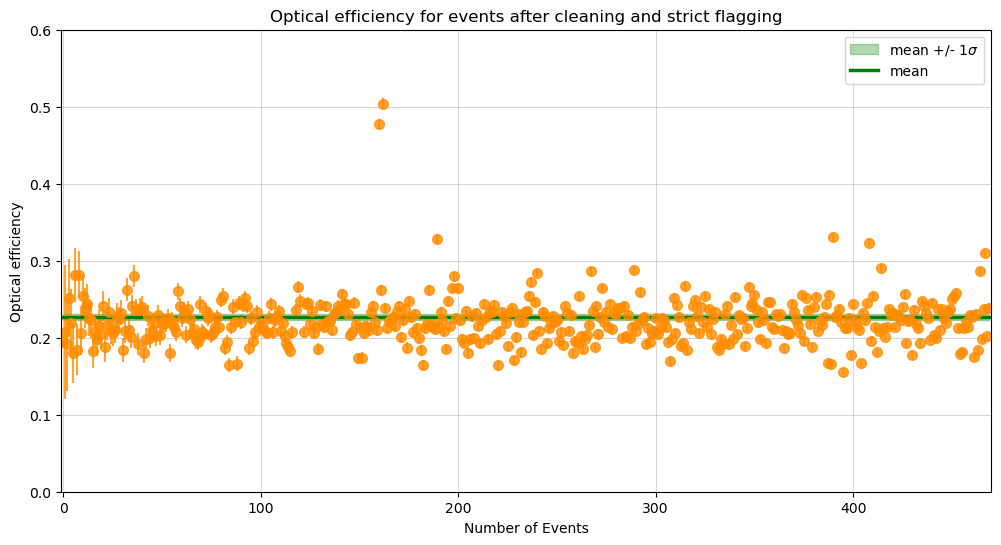

In [194]:
# Images for events with cleaning and flagging
new_opt = [i for i in optical_efficiency_cleaned if i < 1000]
opt_eff_p = new_opt # array with optical efficiencies

x_range_1 = [i for i in range(len(opt_eff_p))] # just x values to plot dots

#std_arr = [np.std(opt_eff_p)/np.mean(opt_eff_p) for i,j in enumerate(opt_eff_p)]
std_arr_1 = [np.std(opt_eff_p)/i**0.5 for i,j in enumerate(opt_eff_p)] # std with statistical influence
std_arr_1_big = [np.std(opt_eff_p) for i,j in enumerate(opt_eff_p)] # std without statistical influence



mean_range_1 = [i-1 for i in range(len(opt_eff_p)+3)] # just x values to plot mean line

y_upper_1 = [np.mean(opt_eff_p)+np.std(opt_eff_p) for i in mean_range_1] # upper value for std fill
y_lower_1 = [np.mean(opt_eff_p)-np.std(opt_eff_p) for i in mean_range_1] # lower value for std fill

y_mid_1 = [np.mean(opt_eff_p) for i in mean_range_1] # line for mean value 
#y_mid_1 = [np.mean(opt_eff_p[:i+1]) for i in range(len(opt_eff_p[:i+1]))]


#y_upper_1 = [j+std_arr_1[-1] for i,j in enumerate(y_mid_1)]
#y_lower_1 = [j-std_arr_1[-1] for i,j in enumerate(y_mid_1)]

#y_upper_1 = [j+std_arr_1[-1] for i,j in enumerate(y_mid_1)]
#y_lower_1 = [j-std_arr_1[-1] for i,j in enumerate(y_mid_1)]


#y_upper_1 = [j+np.std(opt_eff_p[:i+1]) for i,j in enumerate(y_mid_1)]
#y_lower_1 = [j-np.std(opt_eff_p[:i+1]) for i,j in enumerate(y_mid_1)]


y_upper_1 = [j+std_arr_1[-1] for i,j in enumerate([np.mean(opt_eff_p) for i in x_range_1])] # upper bound for std fill but with statistical influence
y_lower_1 = [j-std_arr_1[-1] for i,j in enumerate([np.mean(opt_eff_p) for i in x_range_1])] # lower bound for std fill but with statistical influence

plt.figure(figsize = (12,6))
plt.ylim(0,0.6)

plt.style.use('default')
plt.xlim(-1,len(opt_eff_p))
plt.xlabel("Number of Events")
#plt.ylabel("Optical eff with rel. error for 1 measurment")
plt.ylabel("Optical efficiency")
#plt.title("Opt eff for muon rings without performing additional cleaning int_cut<0.1")
plt.title("Optical efficiency for events after cleaning and strict flagging")
plt.grid(alpha=0.5)
#plt.ylim(0,0.4)

#plt.scatter(x_range_1, opt_eff_p)
plt.errorbar(x_range_1, opt_eff_p, yerr=std_arr_1, fmt='o', ms = 7, alpha = 0.8, color = 'darkorange')#, c = 'blue')#, s = 100)#, c= 'black')


#plt.fill_between(x_range_1, y_upper_1, y_lower_1, color = 'green', alpha = 0.3, label = 'mean +/- $1\sigma$')
plt.fill_between(x_range_1, y_upper_1, y_lower_1, color = 'green', alpha = 0.3, label = 'mean +/- $1\sigma$')
#plt.plot(x_range_1, y_mid_1, label = "mean", c = 'green', linewidth = 1.5)
plt.plot(x_range_1, [np.mean(opt_eff_p) for i in x_range_1], label = "mean", c = 'green', linewidth = 2.5)


plt.legend()
print("mean = ", np.mean(opt_eff_p))
print("std = ", np.std(opt_eff_p))
print("rel_err = ", np.std(opt_eff_p)/np.mean(opt_eff_p))
print("rel std = ", np.std(opt_eff_p)/(len(opt_eff_p)**0.5))
print("len = ", len(opt_eff_p))
#plt.savefig("/Users/vdk/ImagePurgatorium/4LSTprotonsWithoutCleaning.png")

## Raw Events

In [13]:
cut = '25'
optical_efficiency_raw = np.array([])
for i in range(1,50):
    #filename = f'/Users/vdk/output3/opt_eff_raw_stereo_{i*10}_{i*10+10}.txt'
    filename = f'/Users/vdk/raw_output/opt_eff_raw_stereo_{i*10}_{i*10+10}.txt'
    #filename = f'/Users/vdk/intcut_scan_output/opt_eff_raw_stereo_{i*10}_{i*10+10}_int0{cut}.txt'
    with open(filename,'r') as fin:
        line = fin.readline()
        split_line = line.split(',')
        new_line = list(filter(None, split_line))
        new_line = [float(i) for i in new_line]
        optical_efficiency_raw = np.append(optical_efficiency_raw,new_line)
        #print(new_line)

events_raw = []
for i in range(1,50):
    #filename = f'/Users/vdk/output3/opt_eff_raw_stereo_runStat_{i*10}_{i*10+10}.txt'
    filename = f'/Users/vdk/raw_output/opt_eff_raw_stereo_runStat_{i*10}_{i*10+10}.txt'
    #filename = f'/Users/vdk/intcut_scan_output/opt_eff_raw_stereo_runStat_{i*10}_{i*10+10}_int0{cut}.txt'
    with open(filename,'r') as fin:
        line = fin.readline()
        split_line = line.split(',')
        new_line = list(filter(None, split_line))
        new_line = [int(i) for i in new_line]
        events_raw = np.append(events_raw,new_line)
        #print(new_line)

optical_efficiency_raw = list(set(optical_efficiency_raw))
events_raw = list(set(events_raw))


len =  170
mean =  0.22885428796035023
std =  0.021877807795069405
rel_err =  0.09559710674444434
rel std =  0.0016779512611550319
len =  170


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_37752/3032639832.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  std_arr_1 = [np.std(opt_eff_p)/i**0.5 for i,j in enumerate(opt_eff_p)] # std with statistical influence


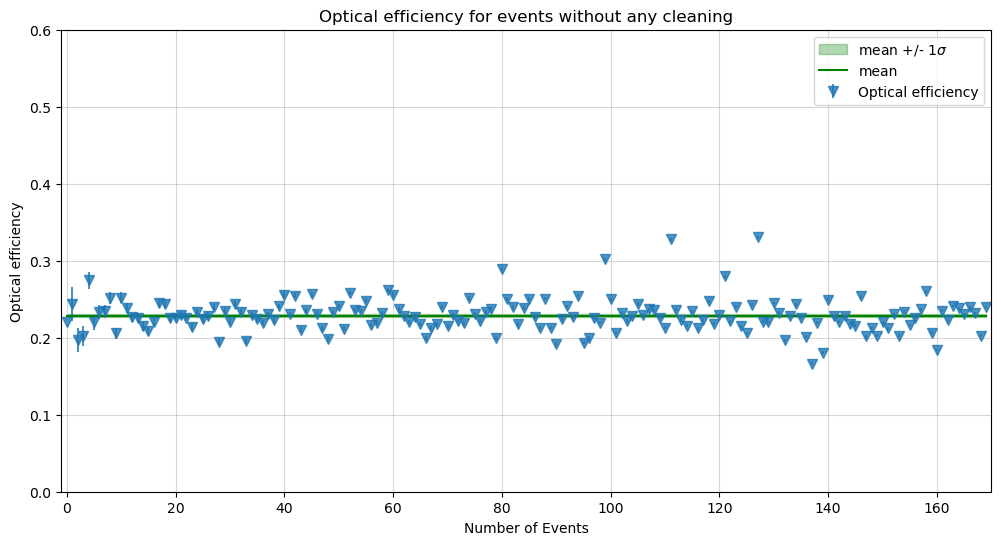

In [14]:
# Images for events without cleaning
new_opt_raw = [i for i in optical_efficiency_raw if i < 1]

opt_eff_p = new_opt_raw # array with optical efficiencies
print("len = ", len(opt_eff_p))
x_range_1 = [i for i in range(len(opt_eff_p))] # just x values to plot dots

#std_arr = [np.std(opt_eff_p)/np.mean(opt_eff_p) for i,j in enumerate(opt_eff_p)]
std_arr_1 = [np.std(opt_eff_p)/i**0.5 for i,j in enumerate(opt_eff_p)] # std with statistical influence
std_arr_1_big = [np.std(opt_eff_p) for i,j in enumerate(opt_eff_p)] # std without statistical influence



mean_range_1 = [i-1 for i in range(len(opt_eff_p)+3)] # just x values to plot mean line

y_upper_1 = [np.mean(opt_eff_p)+np.std(opt_eff_p) for i in mean_range_1] # upper value for std fill
y_lower_1 = [np.mean(opt_eff_p)-np.std(opt_eff_p) for i in mean_range_1] # lower value for std fill

y_mid_1 = [np.mean(opt_eff_p) for i in mean_range_1] # line for mean value 
#y_mid_1 = [np.mean(opt_eff_p[:i+1]) for i in range(len(opt_eff_p[:i+1]))]


#y_upper_1 = [j+std_arr_1[-1] for i,j in enumerate(y_mid_1)]
#y_lower_1 = [j-std_arr_1[-1] for i,j in enumerate(y_mid_1)]

#y_upper_1 = [j+std_arr_1[-1] for i,j in enumerate(y_mid_1)]
#y_lower_1 = [j-std_arr_1[-1] for i,j in enumerate(y_mid_1)]


#y_upper_1 = [j+np.std(opt_eff_p[:i+1]) for i,j in enumerate(y_mid_1)]
#y_lower_1 = [j-np.std(opt_eff_p[:i+1]) for i,j in enumerate(y_mid_1)]


y_upper_1 = [j+std_arr_1[-1] for i,j in enumerate([np.mean(opt_eff_p) for i in x_range_1])] # upper bound for std fill but with statistical influence
y_lower_1 = [j-std_arr_1[-1] for i,j in enumerate([np.mean(opt_eff_p) for i in x_range_1])] # lower bound for std fill but with statistical influence

plt.figure(figsize = (12,6))
plt.ylim(0,0.6)

plt.style.use('default')
plt.xlim(-1,len(opt_eff_p))
plt.xlabel("Number of Events")
#plt.ylabel("Optical eff with rel. error for 1 measurment")
plt.ylabel("Optical efficiency")
#plt.title("Opt eff for muon rings without performing additional cleaning int_cut<0.1")
plt.title(f"Optical efficiency for events without any cleaning")#, optical efficiency = {round(np.mean(opt_eff_p),3)}")
plt.grid(alpha=0.5)
#plt.ylim(0,0.4)

#plt.scatter(x_range_1, opt_eff_p)
plt.errorbar(x_range_1, opt_eff_p, yerr=std_arr_1, fmt='v', ms = 7, alpha = 0.8, label = "Optical efficiency")#, color = 'darkorange')#, c = 'blue')#, s = 100)#, c= 'black')


#plt.fill_between(x_range_1, y_upper_1, y_lower_1, color = 'green', alpha = 0.3, label = 'mean +/- $1\sigma$')
plt.fill_between(x_range_1, y_upper_1, y_lower_1, color = 'green', alpha = 0.3, label = 'mean +/- $1\sigma$')
#plt.plot(x_range_1, y_mid_1, label = "mean", c = 'green', linewidth = 1.5)
plt.plot(x_range_1, [np.mean(opt_eff_p) for i in x_range_1], label = "mean", c = 'green', linewidth = 1.5)


plt.legend()
print("mean = ", np.mean(opt_eff_p))
print("std = ", np.std(opt_eff_p))
print("rel_err = ", np.std(opt_eff_p)/np.mean(opt_eff_p))
print("rel std = ", np.std(opt_eff_p)/(len(opt_eff_p)**0.5))
print("len = ", len(opt_eff_p))
#plt.savefig("/Users/vdk/ImagePurgatorium/4LSTprotonsWithoutCleaning.png")

## Cleaned events

In [243]:
cut = '25'
optical_efficiency = np.array([])
for i in range(1,50):
    #filename = f'/Users/vdk/output/opt_eff_noFlagClean_{i*10}_{i*10+10}.txt'
    filename = f'/Users/vdk/intcut_scan_output/opt_eff_noFlagClean_{i*10}_{i*10+10}_postpix50_int0{cut}.txt'
    with open(filename,'r') as fin:
        line = fin.readline()
        split_line = line.split(',')
        new_line = list(filter(None, split_line))
        new_line = [float(i) for i in new_line]
        optical_efficiency = np.append(optical_efficiency,new_line)
        #print(new_line)

events = []
for i in range(1,50):
    #filename = f'/Users/vdk/output/opt_eff_noFlagClean_runStat_{i*10}_{i*10+10}.txt'
    filename = f'/Users/vdk/intcut_scan_output/opt_eff_noFlagClean_runStat_{i*10}_{i*10+10}_postpix50_int0{cut}.txt'
    with open(filename,'r') as fin:
        line = fin.readline()
        split_line = line.split(',')
        new_line = list(filter(None, split_line))
        new_line = [int(i) for i in new_line]
        events = np.append(events,new_line)
        #print(new_line)


print("len of all opt eff = ", len(optical_efficiency))
optical_efficiency = list(set(optical_efficiency))
print("len of set(opt eff) = ", len(optical_efficiency))


print("len of all events = ", len(events))
events = list(set(events))
print("len of set(events) = ", len(events))

len of all opt eff =  1371
len of set(opt eff) =  738
len of all events =  1371
len of set(events) =  561


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_22416/4230973969.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  std_arr_1 = [np.std(opt_eff_p)/i**0.5 for i,j in enumerate(opt_eff_p)] # std with statistical influence


mean =  0.22119248483667783
std =  0.02633263974375319
rel_err =  0.11904852808718366
rel std =  0.0035778043130099443
len =  736


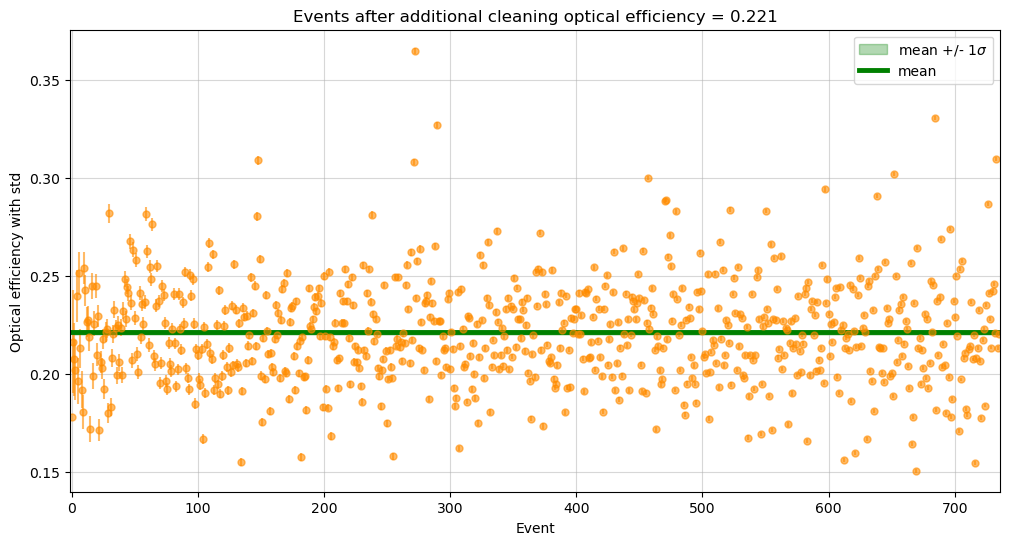

In [246]:
# Images for events without cleaning
new_opt = [i for i in optical_efficiency if i < 0.6]
opt_eff_p = new_opt # optical_efficiency # array with optical efficiencies

x_range_1 = [i for i in range(len(opt_eff_p))] # just x values to plot dots

#std_arr = [np.std(opt_eff_p)/np.mean(opt_eff_p) for i,j in enumerate(opt_eff_p)]
std_arr_1 = [np.std(opt_eff_p)/i**0.5 for i,j in enumerate(opt_eff_p)] # std with statistical influence
std_arr_1_big = [np.std(opt_eff_p) for i,j in enumerate(opt_eff_p)] # std without statistical influence



mean_range_1 = [i-1 for i in range(len(opt_eff_p)+3)] # just x values to plot mean line

y_upper_1 = [np.mean(opt_eff_p)+np.std(opt_eff_p) for i in mean_range_1] # upper value for std fill
y_lower_1 = [np.mean(opt_eff_p)-np.std(opt_eff_p) for i in mean_range_1] # lower value for std fill

y_mid_1 = [np.mean(opt_eff_p) for i in mean_range_1] # line for mean value 
#y_mid_1 = [np.mean(opt_eff_p[:i+1]) for i in range(len(opt_eff_p[:i+1]))]


#y_upper_1 = [j+std_arr_1[-1] for i,j in enumerate(y_mid_1)]
#y_lower_1 = [j-std_arr_1[-1] for i,j in enumerate(y_mid_1)]

#y_upper_1 = [j+std_arr_1[-1] for i,j in enumerate(y_mid_1)]
#y_lower_1 = [j-std_arr_1[-1] for i,j in enumerate(y_mid_1)]


#y_upper_1 = [j+np.std(opt_eff_p[:i+1]) for i,j in enumerate(y_mid_1)]
#y_lower_1 = [j-np.std(opt_eff_p[:i+1]) for i,j in enumerate(y_mid_1)]


y_upper_1 = [j+std_arr_1[-1] for i,j in enumerate([np.mean(opt_eff_p) for i in x_range_1])] # upper bound for std fill but with statistical influence
y_lower_1 = [j-std_arr_1[-1] for i,j in enumerate([np.mean(opt_eff_p) for i in x_range_1])] # lower bound for std fill but with statistical influence

plt.figure(figsize = (12,6))
#plt.ylim(0,0.6)

plt.style.use('default')
plt.xlim(-1,len(opt_eff_p))
plt.xlabel("Event")
#plt.ylabel("Optical eff with rel. error for 1 measurment")
plt.ylabel("Optical efficiency with std")
#plt.title("Opt eff for muon rings without performing additional cleaning int_cut<0.1")
plt.title(f"Events after additional cleaning optical efficiency = {round(np.mean(opt_eff_p),3)}")
plt.grid(alpha=0.5)
#plt.ylim(0,0.4)

#plt.scatter(x_range_1, opt_eff_p)
plt.errorbar(x_range_1, opt_eff_p, yerr=std_arr_1, fmt='o', ms = 5, alpha = 0.6, color = 'darkorange')#, c = 'blue')#, s = 100)#, c= 'black')


#plt.fill_between(x_range_1, y_upper_1, y_lower_1, color = 'green', alpha = 0.3, label = 'mean +/- $1\sigma$')
plt.fill_between(x_range_1, y_upper_1, y_lower_1, color = 'green', alpha = 0.3, label = 'mean +/- $1\sigma$')
#plt.plot(x_range_1, y_mid_1, label = "mean", c = 'green', linewidth = 1.5)
plt.plot(x_range_1, [np.mean(opt_eff_p) for i in x_range_1], label = "mean", c = 'green', linewidth = 3.5)


plt.legend()
print("mean = ", np.mean(opt_eff_p))
print("std = ", np.std(opt_eff_p))
print("rel_err = ", np.std(opt_eff_p)/np.mean(opt_eff_p))
print("rel std = ", np.std(opt_eff_p)/len(opt_eff_p)*100)
print("len = ", len(opt_eff_p))
#plt.savefig("/Users/vdk/ImagePurgatorium/4LSTprotonsWithoutCleaningIntCut0.3_Containment>0.5_RelStd_ArtificialGood.png")

## Double checked cleaned

In [2]:
optical_efficiency = np.array([])
for i in range(1,50):
    filename = f'/Users/vdk/output3/opt_eff_noFlagClean_{i*10}_{i*10+10}_postpix50.txt'
    with open(filename,'r') as fin:
        line = fin.readline()
        split_line = line.split(',')
        new_line = list(filter(None, split_line))
        new_line = [float(i) for i in new_line]
        optical_efficiency = np.append(optical_efficiency,new_line)
        #print(new_line)

events = []
for i in range(1,50):
    filename = f'/Users/vdk/output3/opt_eff_noFlagClean_runStat_{i*10}_{i*10+10}_postpix50.txt'
    with open(filename,'r') as fin:
        line = fin.readline()
        split_line = line.split(',')
        new_line = list(filter(None, split_line))
        new_line = [int(i) for i in new_line]
        events = np.append(events,new_line)
        #print(new_line)

optical_efficiency = list(set(optical_efficiency))
events = list(set(events))

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_37752/2080234111.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  std_arr_1 = [np.std(opt_eff_p)/i**0.5 for i,j in enumerate(opt_eff_p)] # std with statistical influence


mean =  0.22179703887890284
std =  0.030761278459393516
rel_err =  0.13869111424967498
rel std =  0.0010477333021600295
len =  862


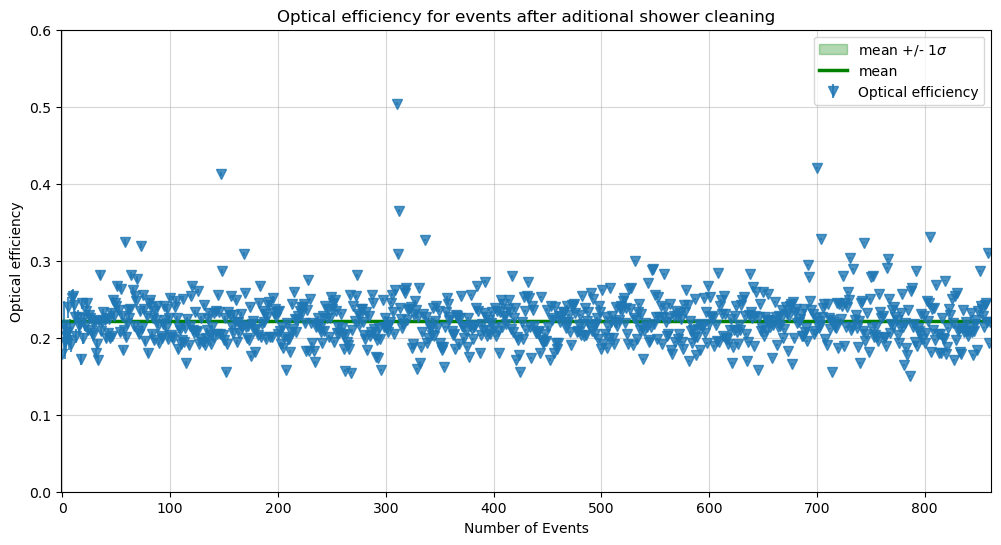

In [18]:
# Images for events without cleaning
new_opt = [i for i in optical_efficiency if i < 0.6]
opt_eff_p = new_opt # optical_efficiency # array with optical efficiencies

x_range_1 = [i for i in range(len(opt_eff_p))] # just x values to plot dots

#std_arr = [np.std(opt_eff_p)/np.mean(opt_eff_p) for i,j in enumerate(opt_eff_p)]
std_arr_1 = [np.std(opt_eff_p)/i**0.5 for i,j in enumerate(opt_eff_p)] # std with statistical influence
std_arr_1_big = [np.std(opt_eff_p) for i,j in enumerate(opt_eff_p)] # std without statistical influence



mean_range_1 = [i-1 for i in range(len(opt_eff_p)+3)] # just x values to plot mean line

y_upper_1 = [np.mean(opt_eff_p)+np.std(opt_eff_p) for i in mean_range_1] # upper value for std fill
y_lower_1 = [np.mean(opt_eff_p)-np.std(opt_eff_p) for i in mean_range_1] # lower value for std fill

y_mid_1 = [np.mean(opt_eff_p) for i in mean_range_1] # line for mean value 
#y_mid_1 = [np.mean(opt_eff_p[:i+1]) for i in range(len(opt_eff_p[:i+1]))]


#y_upper_1 = [j+std_arr_1[-1] for i,j in enumerate(y_mid_1)]
#y_lower_1 = [j-std_arr_1[-1] for i,j in enumerate(y_mid_1)]

#y_upper_1 = [j+std_arr_1[-1] for i,j in enumerate(y_mid_1)]
#y_lower_1 = [j-std_arr_1[-1] for i,j in enumerate(y_mid_1)]


#y_upper_1 = [j+np.std(opt_eff_p[:i+1]) for i,j in enumerate(y_mid_1)]
#y_lower_1 = [j-np.std(opt_eff_p[:i+1]) for i,j in enumerate(y_mid_1)]


y_upper_1 = [j+std_arr_1[-1] for i,j in enumerate([np.mean(opt_eff_p) for i in x_range_1])] # upper bound for std fill but with statistical influence
y_lower_1 = [j-std_arr_1[-1] for i,j in enumerate([np.mean(opt_eff_p) for i in x_range_1])] # lower bound for std fill but with statistical influence

plt.figure(figsize = (12,6))
plt.ylim(0,0.6)

plt.style.use('default')
plt.xlim(-1,len(opt_eff_p))
plt.xlabel("Number of Events")
#plt.ylabel("Optical eff with rel. error for 1 measurment")
plt.ylabel("Optical efficiency")
#plt.title("Opt eff for muon rings without performing additional cleaning int_cut<0.1")
plt.title("Optical efficiency for events after aditional shower cleaning") #, optical efficiency = 0.221")
plt.grid(alpha=0.5)
#plt.ylim(0,1)

#plt.scatter(x_range_1, opt_eff_p)
plt.errorbar(x_range_1, opt_eff_p, yerr=std_arr_1, fmt='v', ms = 7, alpha = 0.8, label = "Optical efficiency")#, color = 'darkorange')#, c = 'blue')#, s = 100)#, c= 'black')


#plt.fill_between(x_range_1, y_upper_1, y_lower_1, color = 'green', alpha = 0.3, label = 'mean +/- $1\sigma$')
plt.fill_between(x_range_1, y_upper_1, y_lower_1, color = 'green', alpha = 0.3, label = 'mean +/- $1\sigma$')
#plt.plot(x_range_1, y_mid_1, label = "mean", c = 'green', linewidth = 1.5)
plt.plot(x_range_1, [np.mean(opt_eff_p) for i in x_range_1], label = "mean", c = 'green', linewidth = 2.5)


plt.legend()
print("mean = ", np.mean(opt_eff_p))
print("std = ", np.std(opt_eff_p))
print("rel_err = ", np.std(opt_eff_p)/np.mean(opt_eff_p))
print("rel std = ", np.std(opt_eff_p)/(len(opt_eff_p)**0.5))
print("len = ", len(opt_eff_p))
#plt.savefig("/Users/vdk/ImagePurgatorium/4LSTprotonsCleaned.png")

In [108]:
print_events = [int(i) for i in events]
print_opt = [i for i in optical_efficiency]
for i,event in enumerate(print_events):
    print(f"event = {event} has optical throughput = {print_opt[i]}")

event = 10086 has optical throughput = 0.17824907182077343
event = 10086 has optical throughput = 0.17824907182077343
event = 10182 has optical throughput = 0.22758523124841432
event = 10182 has optical throughput = 0.22758523124841432
event = 11614 has optical throughput = 0.20623056318723967
event = 11614 has optical throughput = 0.20623056318723967
event = 11614 has optical throughput = 0.20623056318723967
event = 11676 has optical throughput = 0.258569923741452
event = 11676 has optical throughput = 0.258569923741452
event = 11676 has optical throughput = 0.258569923741452
event = 11676 has optical throughput = 0.258569923741452
event = 11697 has optical throughput = 0.308958420235623
event = 11697 has optical throughput = 0.308958420235623
event = 11697 has optical throughput = 0.308958420235623
event = 14591 has optical throughput = 0.23916105724164
event = 15235 has optical throughput = 0.22771388908266546
event = 15235 has optical throughput = 0.22771388908266546
event = 15235 

In [160]:
0.0010477333021600295 / 0.0016779512611550319

0.6244122379566696

In [79]:
sorted(events_raw)

[16128.0,
 16529.0,
 19588.0,
 22355.0,
 26445.0,
 26628.0,
 30023.0,
 30236.0,
 31423.0,
 34252.0,
 43002.0,
 44512.0,
 45315.0,
 46404.0,
 46649.0,
 49579.0,
 51599.0,
 62224.0,
 64655.0,
 65535.0,
 73406.0,
 75354.0,
 77229.0,
 83446.0,
 85071.0,
 87400.0,
 91660.0,
 97194.0,
 98178.0,
 103208.0,
 104316.0,
 111697.0,
 113095.0,
 114050.0,
 114603.0,
 115050.0,
 116057.0,
 116123.0,
 117405.0,
 119231.0,
 119514.0,
 121531.0,
 122456.0,
 123336.0,
 124286.0,
 124636.0,
 130018.0,
 130305.0,
 131415.0,
 131531.0,
 134261.0,
 138020.0,
 143262.0,
 144109.0,
 145239.0,
 145671.0,
 153620.0,
 154151.0,
 164185.0,
 169442.0,
 170493.0,
 174208.0,
 178058.0,
 178460.0,
 179383.0,
 179486.0,
 179638.0,
 181642.0,
 187516.0,
 189364.0,
 189406.0,
 189587.0,
 189740.0,
 190068.0,
 190103.0,
 191330.0,
 193127.0,
 193544.0,
 195347.0,
 201321.0,
 202222.0,
 210108.0,
 217540.0,
 223546.0,
 224114.0,
 226168.0,
 229508.0,
 244538.0,
 245134.0,
 248424.0,
 249268.0,
 251147.0,
 251672.0,
 25914

In [162]:
len(set(events))

662

In [ ]:
for i,j in enumerate(sorted(events)):
    print(f"event number {j} has optical efficiency = {optical_efficiency[i]}")

In [42]:
event_counter = np.array([])
for i in range(1,50):
    filename = f'/Users/vdk/output3/opt_eff_raw_stereo_AllEvents_{i*10}_{i*10+10}.txt'
    with open(filename,'r') as fin:
        line = fin.readline()
        split_line = line.split(',')
        new_line = list(filter(None, split_line))
        new_line = [float(i) for i in new_line]
        event_counter = np.append(event_counter, new_line)

print("Number of events = ", sum(event_counter.flatten()))     

Number of events =  148305.0


In [ ]:
event

148305.0

In [41]:
event_counter = np.array([])
for i in range(1,50):
    filename = f'/Users/vdk/output3/opt_eff_noFlagClean_allEvents_{i*10}_{i*10+10}_postpix50.txt'
    with open(filename,'r') as fin:
        line = fin.readline()
        split_line = line.split(',')
        new_line = list(filter(None, split_line))
        new_line = [float(i) for i in new_line]
        event_counter = np.append(event_counter, new_line)


print("Number of events = ", sum(event_counter.flatten())) 

Number of events =  148305.0


In [ ]:
    candidate_clean_ring = all(
        [radial_distribution['standard_dev'] < params['max_radial_stdev'],
         radial_distribution['excess_kurtosis'] < params['max_radial_excess_kurtosis'],
         (pix_ring > params['tailcuts'][0]).sum() >
         params['min_pix_fraction_after_cleaning'] * params['min_pix'],
         np.count_nonzero(pix_ring) > params['min_pix'],
         muonringparam.radius < params['max_ring_radius'],
         muonringparam.radius > params['min_ring_radius']
         ])